# Atomic SPADL 변환 테스트 결과

이 노트북은 Wyscout 데이터를 Atomic SPADL 형식으로 변환한 테스트 결과를 보여줍니다.

## 테스트 개요

- **목적**: Wyscout 원본 데이터를 Atomic SPADL 형식으로 변환하는 파이프라인 검증
- **방법**: socceraction 라이브러리를 사용하여 SPADL → Atomic SPADL 변환
- **데이터**: Wyscout 공개 데이터셋 (2017/18 시즌)


## 1. 라이브러리 및 설정


In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# socceraction 경로 추가
sys.path.insert(0, '/root/AIS/socceraction')

import socceraction.atomic.spadl.config as atomicspadl_config

# 시각화 설정
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("라이브러리 로드 완료")


라이브러리 로드 완료


## 2. 테스트 데이터 로드


In [2]:
# 전처리된 Atomic SPADL 데이터 로드
data_path = Path("../data/processed/vaep_train_atomic_spadl.csv")

if data_path.exists():
    df = pd.read_csv(data_path)
    print(f"✓ 데이터 로드 완료: {len(df):,}개 Atomic SPADL 액션")
    print(f"\n컬럼: {list(df.columns)}")
    print(f"\n데이터 크기: {df.shape}")
else:
    print(f"✗ 데이터 파일을 찾을 수 없습니다: {data_path}")
    print("전처리 스크립트를 먼저 실행해주세요.")
    df = None


✓ 데이터 로드 완료: 11,211개 Atomic SPADL 액션

컬럼: ['game_id', 'original_event_id', 'action_id', 'period_id', 'time_seconds', 'team_id', 'player_id', 'x', 'y', 'dx', 'dy', 'type_id', 'bodypart_id', 'league']

데이터 크기: (11211, 14)


## 3. 기본 통계


In [3]:
if df is not None:
    print("=" * 80)
    print("기본 통계")
    print("=" * 80)
    
    print(f"\n총 Atomic SPADL 액션 수: {len(df):,}")
    print(f"고유 게임 수: {df['game_id'].nunique()}")
    print(f"고유 선수 수: {df['player_id'].nunique()}")
    print(f"고유 팀 수: {df['team_id'].nunique()}")
    
    if 'league' in df.columns:
        print(f"\n리그 분포:")
        print(df['league'].value_counts())
    
    print(f"\n경기당 평균 액션 수: {len(df) / df['game_id'].nunique():.1f}")
    print(f"선수당 평균 액션 수: {len(df) / df['player_id'].nunique():.1f}")


기본 통계

총 Atomic SPADL 액션 수: 11,211
고유 게임 수: 5
고유 선수 수: 140
고유 팀 수: 10

리그 분포:
league
Italy    11211
Name: count, dtype: int64

경기당 평균 액션 수: 2242.2
선수당 평균 액션 수: 80.1


## 4. Atomic SPADL 액션 타입 분석


In [4]:
if df is not None:
    # type_id를 type_name으로 변환
    if 'type_name' not in df.columns:
        df['type_name'] = df['type_id'].apply(
            lambda x: atomicspadl_config.actiontypes[x] if x < len(atomicspadl_config.actiontypes) else f"unknown_{x}"
        )
    
    print("=" * 80)
    print("Atomic SPADL 액션 타입 분포")
    print("=" * 80)
    
    action_counts = df['type_name'].value_counts()
    print(f"\n총 {len(action_counts)}개 액션 타입")
    print(f"\n상위 15개 액션 타입:")
    print(action_counts.head(15))
    
    # Receival 액션 확인 (Atomic SPADL의 핵심 특징)
    receival_count = (df['type_name'] == 'receival').sum()
    pass_count = (df['type_name'] == 'pass').sum()
    
    print(f"\n" + "=" * 80)
    print("Atomic SPADL 특징 확인")
    print("=" * 80)
    print(f"Pass 액션: {pass_count:,}개")
    print(f"Receival 액션: {receival_count:,}개")
    if pass_count > 0:
        print(f"Receival/Pass 비율: {receival_count/pass_count:.2f}")
    print(f"\n→ 패스 발신/수신이 분리되어 있음을 확인!")


Atomic SPADL 액션 타입 분포

총 23개 액션 타입

상위 15개 액션 타입:
type_name
pass            4193
receival        3678
interception    1112
dribble          722
out              245
throw_in         217
clearance        171
cross            142
freekick         137
foul             121
shot             115
take_on           99
goalkick          84
corner            61
keeper_save       39
Name: count, dtype: int64

Atomic SPADL 특징 확인
Pass 액션: 4,193개
Receival 액션: 3,678개
Receival/Pass 비율: 0.88

→ 패스 발신/수신이 분리되어 있음을 확인!


## 5. 액션 타입 시각화


/tmp/ipykernel_319139/253924447.py:27: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_319139/253924447.py:27: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_319139/253924447.py:27: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_319139/253924447.py:27: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_319139/253924447.py:27: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_319139/253924447.py:27: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_319139/253924447.py:27: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  plt.

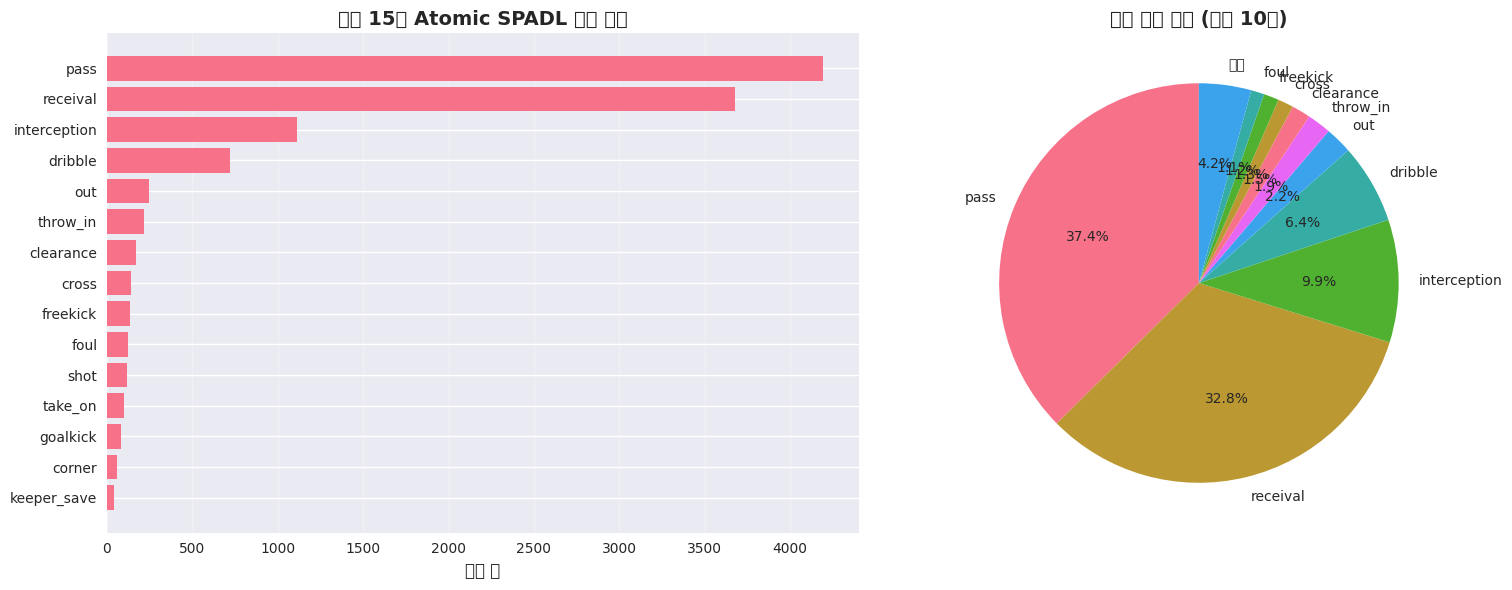

In [5]:
if df is not None:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 상위 15개 액션 타입 막대 그래프
    top_actions = df['type_name'].value_counts().head(15)
    axes[0].barh(range(len(top_actions)), top_actions.values)
    axes[0].set_yticks(range(len(top_actions)))
    axes[0].set_yticklabels(top_actions.index, fontsize=10)
    axes[0].set_xlabel('액션 수', fontsize=12)
    axes[0].set_title('상위 15개 Atomic SPADL 액션 타입', fontsize=14, fontweight='bold')
    axes[0].invert_yaxis()
    axes[0].grid(axis='x', alpha=0.3)
    
    # 액션 타입 비율 파이 차트
    top_10_actions = df['type_name'].value_counts().head(10)
    other_count = df['type_name'].value_counts().iloc[10:].sum()
    if other_count > 0:
        pie_data = list(top_10_actions.values) + [other_count]
        pie_labels = list(top_10_actions.index) + ['기타']
    else:
        pie_data = top_10_actions.values
        pie_labels = top_10_actions.index
    
    axes[1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('액션 타입 비율 (상위 10개)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    # 이미지 저장
    output_path = Path("../data/processed/atomic_spadl_action_types.png")
    plt.savefig(output_path, dpi=150, bbox_inches='tight')
    print(f"✓ 시각화 저장: {output_path}")
    plt.show()


## 6. 위치 정보 분석 (x, y, dx, dy)


In [6]:
if df is not None:
    print("=" * 80)
    print("위치 정보 통계")
    print("=" * 80)
    
    print(f"\nX 좌표 (필드 길이 방향, 0-105m):")
    print(f"  평균: {df['x'].mean():.2f}m")
    print(f"  중앙값: {df['x'].median():.2f}m")
    print(f"  범위: {df['x'].min():.2f}m ~ {df['x'].max():.2f}m")
    
    print(f"\nY 좌표 (필드 폭 방향, 0-68m):")
    print(f"  평균: {df['y'].mean():.2f}m")
    print(f"  중앙값: {df['y'].median():.2f}m")
    print(f"  범위: {df['y'].min():.2f}m ~ {df['y'].max():.2f}m")
    
    print(f"\n이동 거리 (dx, dy):")
    df['movement_distance'] = np.sqrt(df['dx']**2 + df['dy']**2)
    print(f"  평균 이동 거리: {df['movement_distance'].mean():.2f}m")
    print(f"  중앙값 이동 거리: {df['movement_distance'].median():.2f}m")
    print(f"  최대 이동 거리: {df['movement_distance'].max():.2f}m")


위치 정보 통계

X 좌표 (필드 길이 방향, 0-105m):
  평균: 51.93m
  중앙값: 51.45m
  범위: 0.00m ~ 105.00m

Y 좌표 (필드 폭 방향, 0-68m):
  평균: 34.18m
  중앙값: 34.00m
  범위: 0.00m ~ 68.00m

이동 거리 (dx, dy):
  평균 이동 거리: 10.73m
  중앙값 이동 거리: 5.63m
  최대 이동 거리: 119.89m


## 7. 위치 정보 시각화


/tmp/ipykernel_319139/2757901478.py:44: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_319139/2757901478.py:44: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_319139/2757901478.py:44: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_319139/2757901478.py:44: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_319139/2757901478.py:44: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_319139/2757901478.py:44: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_319139/2757901478.py:44: UserWarning: Glyph 54596 (\N{HANGUL SYLLABLE PIL}) missing from font(s) DejaVu Sans.
 

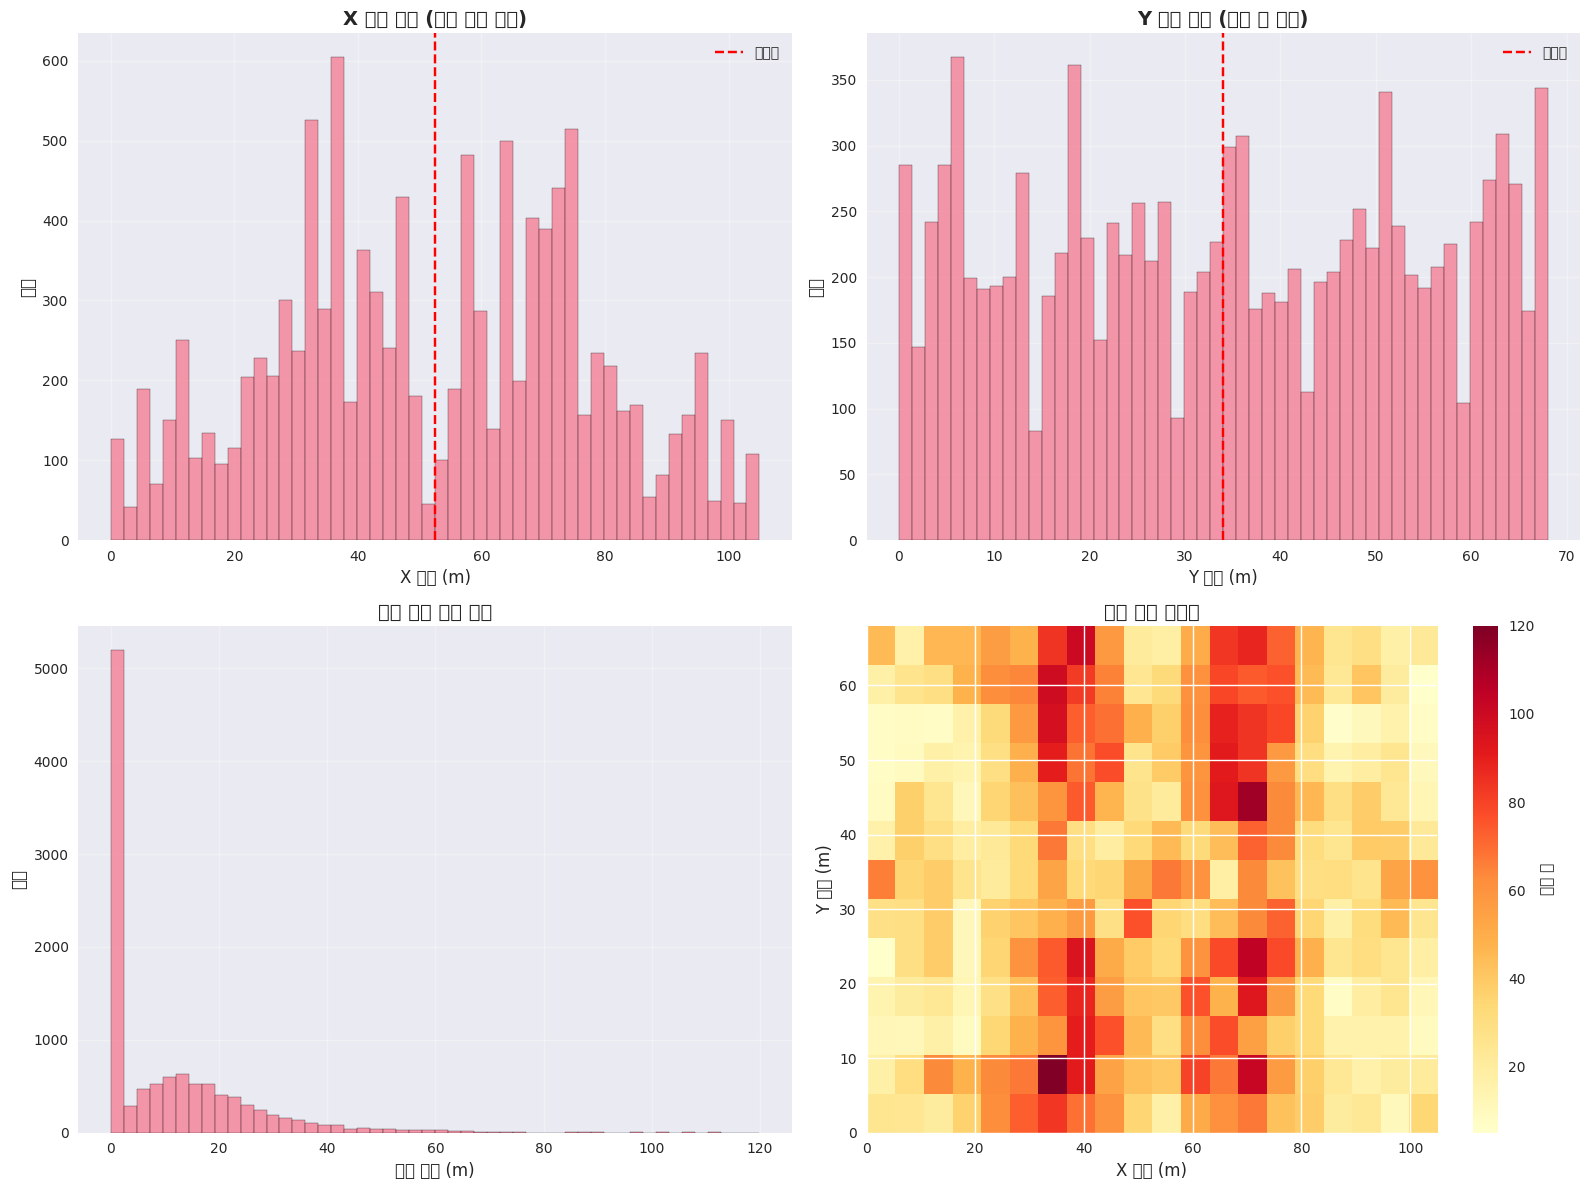

In [7]:
if df is not None:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # X 좌표 분포
    axes[0, 0].hist(df['x'], bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].set_xlabel('X 좌표 (m)', fontsize=12)
    axes[0, 0].set_ylabel('빈도', fontsize=12)
    axes[0, 0].set_title('X 좌표 분포 (필드 길이 방향)', fontsize=14, fontweight='bold')
    axes[0, 0].axvline(52.5, color='r', linestyle='--', label='중앙선')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # Y 좌표 분포
    axes[0, 1].hist(df['y'], bins=50, edgecolor='black', alpha=0.7)
    axes[0, 1].set_xlabel('Y 좌표 (m)', fontsize=12)
    axes[0, 1].set_ylabel('빈도', fontsize=12)
    axes[0, 1].set_title('Y 좌표 분포 (필드 폭 방향)', fontsize=14, fontweight='bold')
    axes[0, 1].axvline(34.0, color='r', linestyle='--', label='중앙선')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    # 이동 거리 분포
    if 'movement_distance' not in df.columns:
        df['movement_distance'] = np.sqrt(df['dx']**2 + df['dy']**2)
    axes[1, 0].hist(df['movement_distance'], bins=50, edgecolor='black', alpha=0.7)
    axes[1, 0].set_xlabel('이동 거리 (m)', fontsize=12)
    axes[1, 0].set_ylabel('빈도', fontsize=12)
    axes[1, 0].set_title('액션 이동 거리 분포', fontsize=14, fontweight='bold')
    axes[1, 0].grid(alpha=0.3)
    
    # 필드 히트맵 (액션 위치)
    # 필드 크기: 105m x 68m
    x_bins = np.linspace(0, 105, 21)
    y_bins = np.linspace(0, 68, 14)
    heatmap, xedges, yedges = np.histogram2d(df['x'], df['y'], bins=[x_bins, y_bins])
    
    im = axes[1, 1].imshow(heatmap.T, origin='lower', aspect='auto', 
                          extent=[0, 105, 0, 68], cmap='YlOrRd', interpolation='nearest')
    axes[1, 1].set_xlabel('X 좌표 (m)', fontsize=12)
    axes[1, 1].set_ylabel('Y 좌표 (m)', fontsize=12)
    axes[1, 1].set_title('액션 위치 히트맵', fontsize=14, fontweight='bold')
    plt.colorbar(im, ax=axes[1, 1], label='액션 수')
    
    plt.tight_layout()
    # 이미지 저장
    output_path = Path("../data/processed/atomic_spadl_positions.png")
    plt.savefig(output_path, dpi=150, bbox_inches='tight')
    print(f"✓ 시각화 저장: {output_path}")
    plt.show()


## 8. Receival 액션 상세 분석


In [8]:
if df is not None:
    receival_actions = df[df['type_name'] == 'receival'].copy()
    pass_actions = df[df['type_name'] == 'pass'].copy()
    
    print("=" * 80)
    print("Receival vs Pass 비교")
    print("=" * 80)
    
    if len(receival_actions) > 0 and len(pass_actions) > 0:
        print(f"\nPass 액션:")
        print(f"  총 개수: {len(pass_actions):,}")
        print(f"  평균 X 위치: {pass_actions['x'].mean():.2f}m")
        print(f"  평균 Y 위치: {pass_actions['y'].mean():.2f}m")
        pass_movement = np.sqrt(pass_actions['dx']**2 + pass_actions['dy']**2)
        print(f"  평균 이동 거리: {pass_movement.mean():.2f}m")
        
        print(f"\nReceival 액션:")
        print(f"  총 개수: {len(receival_actions):,}")
        print(f"  평균 X 위치: {receival_actions['x'].mean():.2f}m")
        print(f"  평균 Y 위치: {receival_actions['y'].mean():.2f}m")
        receival_movement = np.sqrt(receival_actions['dx']**2 + receival_actions['dy']**2)
        print(f"  평균 이동 거리: {receival_movement.mean():.2f}m (수신 지점이므로 거의 0)")
        
        # Pass-Receival 쌍 확인 (같은 original_event_id)
        if 'original_event_id' in df.columns:
            pass_receival_pairs = pd.merge(
                pass_actions[['original_event_id', 'game_id', 'x', 'y']],
                receival_actions[['original_event_id', 'game_id', 'x', 'y']],
                on=['original_event_id', 'game_id'],
                suffixes=('_pass', '_receival')
            )
            
            if len(pass_receival_pairs) > 0:
                print(f"\nPass-Receival 쌍: {len(pass_receival_pairs):,}개")
                pair_distance = np.sqrt(
                    (pass_receival_pairs['x_receival'] - pass_receival_pairs['x_pass'])**2 + 
                    (pass_receival_pairs['y_receival'] - pass_receival_pairs['y_pass'])**2
                )
                print(f"  평균 패스 거리: {pair_distance.mean():.2f}m")
                print(f"  중앙값 패스 거리: {pair_distance.median():.2f}m")


Receival vs Pass 비교

Pass 액션:
  총 개수: 4,193
  평균 X 위치: 52.71m
  평균 Y 위치: 34.20m
  평균 이동 거리: 19.82m

Receival 액션:
  총 개수: 3,678
  평균 X 위치: 52.48m
  평균 Y 위치: 34.37m
  평균 이동 거리: 0.00m (수신 지점이므로 거의 0)

Pass-Receival 쌍: 3,281개
  평균 패스 거리: 18.44m
  중앙값 패스 거리: 16.35m


## 9. 테스트 결과 요약


In [9]:
if df is not None:
    print("=" * 80)
    print("Atomic SPADL 변환 테스트 결과 요약")
    print("=" * 80)
    
    print(f"\n✅ 변환 성공")
    print(f"  - 총 {len(df):,}개 Atomic SPADL 액션 생성")
    print(f"  - {df['game_id'].nunique()}개 게임 처리")
    print(f"  - {df['player_id'].nunique()}명의 선수")
    
    print(f"\n✅ Atomic SPADL 특징 확인")
    receival_count = (df['type_name'] == 'receival').sum()
    pass_count = (df['type_name'] == 'pass').sum()
    print(f"  - Pass 액션: {pass_count:,}개")
    print(f"  - Receival 액션: {receival_count:,}개")
    print(f"  - → 패스 발신/수신이 성공적으로 분리됨")
    
    print(f"\n✅ 데이터 형식")
    print(f"  - 좌표 시스템: 메터 단위 (x: 0-105m, y: 0-68m)")
    print(f"  - 이동 벡터: dx, dy 사용")
    print(f"  - 필수 컬럼 모두 존재")
    
    print(f"\n✅ 다음 단계")
    print(f"  1. 전체 데이터 전처리 실행")
    print(f"  2. Atomic VAEP 모델 학습")
    print(f"  3. 선수별 VAEP 값 계산")
    
    print("\n" + "=" * 80)


Atomic SPADL 변환 테스트 결과 요약

✅ 변환 성공
  - 총 11,211개 Atomic SPADL 액션 생성
  - 5개 게임 처리
  - 140명의 선수

✅ Atomic SPADL 특징 확인
  - Pass 액션: 4,193개
  - Receival 액션: 3,678개
  - → 패스 발신/수신이 성공적으로 분리됨

✅ 데이터 형식
  - 좌표 시스템: 메터 단위 (x: 0-105m, y: 0-68m)
  - 이동 벡터: dx, dy 사용
  - 필수 컬럼 모두 존재

✅ 다음 단계
  1. 전체 데이터 전처리 실행
  2. Atomic VAEP 모델 학습
  3. 선수별 VAEP 값 계산

